In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model, metrics

#### 1. Data Wrangling

In [301]:
# read data
df = pd.read_csv("melb_data.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [302]:
# get the shape of the data
df.shape

(13580, 21)

In [303]:
pd.isna(df).sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [304]:
df_clean = df.drop(columns = ["BuildingArea", "YearBuilt", "CouncilArea"], axis=1)
df_clean.shape

(13580, 18)

In [305]:
pd.isna(df_clean).sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car              62
Landsize          0
Lattitude         0
Longtitude        0
Regionname        0
Propertycount     0
dtype: int64

In [306]:
# picks all the rows that has car value null
# df_clean = df_clean[pd.isnull(df_clean.Car)]

# pick all the rows which has no car null values
df_clean = df_clean.loc[df_clean["Car"].notnull()]

In [307]:
# need to reset index for the data
df_clean = df_clean.reset_index()
df_clean.drop("index", axis=1, inplace=True)
df_clean

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13513,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13514,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
13515,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
13516,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


<AxesSubplot:ylabel='Price'>

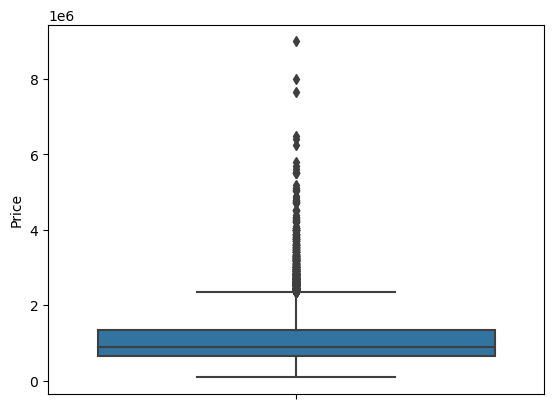

In [308]:
sns.boxplot(y="Price", data=df_clean)

In [309]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Address        13518 non-null  object 
 2   Rooms          13518 non-null  int64  
 3   Type           13518 non-null  object 
 4   Price          13518 non-null  float64
 5   Method         13518 non-null  object 
 6   SellerG        13518 non-null  object 
 7   Date           13518 non-null  object 
 8   Distance       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Bedroom2       13518 non-null  float64
 11  Bathroom       13518 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13518 non-null  float64
 14  Lattitude      13518 non-null  float64
 15  Longtitude     13518 non-null  float64
 16  Regionname     13518 non-null  object 
 17  Propertycount  13518 non-null  float64
dtypes: flo

In [310]:
df_clean.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,13518.000000,1.351800e+04,13518.000000,13518.000000,13518.000000,13518.00000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000
mean,2.939784,1.074796e+06,10.157827,3105.227401,2.916408,1.53536,1.610075,558.110593,-37.809191,144.995306,7455.482986
std,0.956438,6.398586e+05,5.861593,90.724572,0.966692,0.69231,0.962634,3998.194560,0.079366,0.104003,4381.437721
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.00000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.00000,1.000000,178.000000,-37.857000,144.929425,4380.000000
50%,3.000000,9.010000e+05,9.200000,3084.000000,3.000000,1.00000,2.000000,442.500000,-37.802300,145.000300,6567.000000
75%,3.000000,1.328000e+06,13.000000,3148.000000,3.000000,2.00000,2.000000,651.000000,-37.756203,145.058600,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.00000,10.000000,433014.000000,-37.408530,145.526350,21650.000000


In [311]:
# imbalanced data towards h
df_clean["Type"].value_counts()

h    9389
u    3015
t    1114
Name: Type, dtype: int64

In [312]:
df_clean["Suburb"].value_counts()

Reservoir         359
Richmond          259
Bentleigh East    249
Preston           239
Brunswick         221
                 ... 
Sandhurst           1
Bullengarook        1
Montrose            1
Croydon South       1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

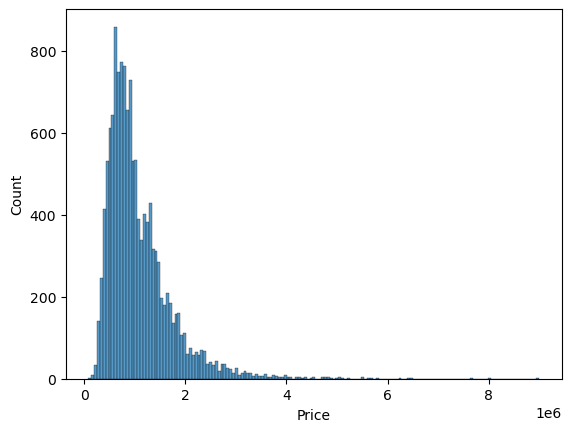

In [313]:
sns.histplot(x="Price", data=df_clean)
# plot does not look so normal

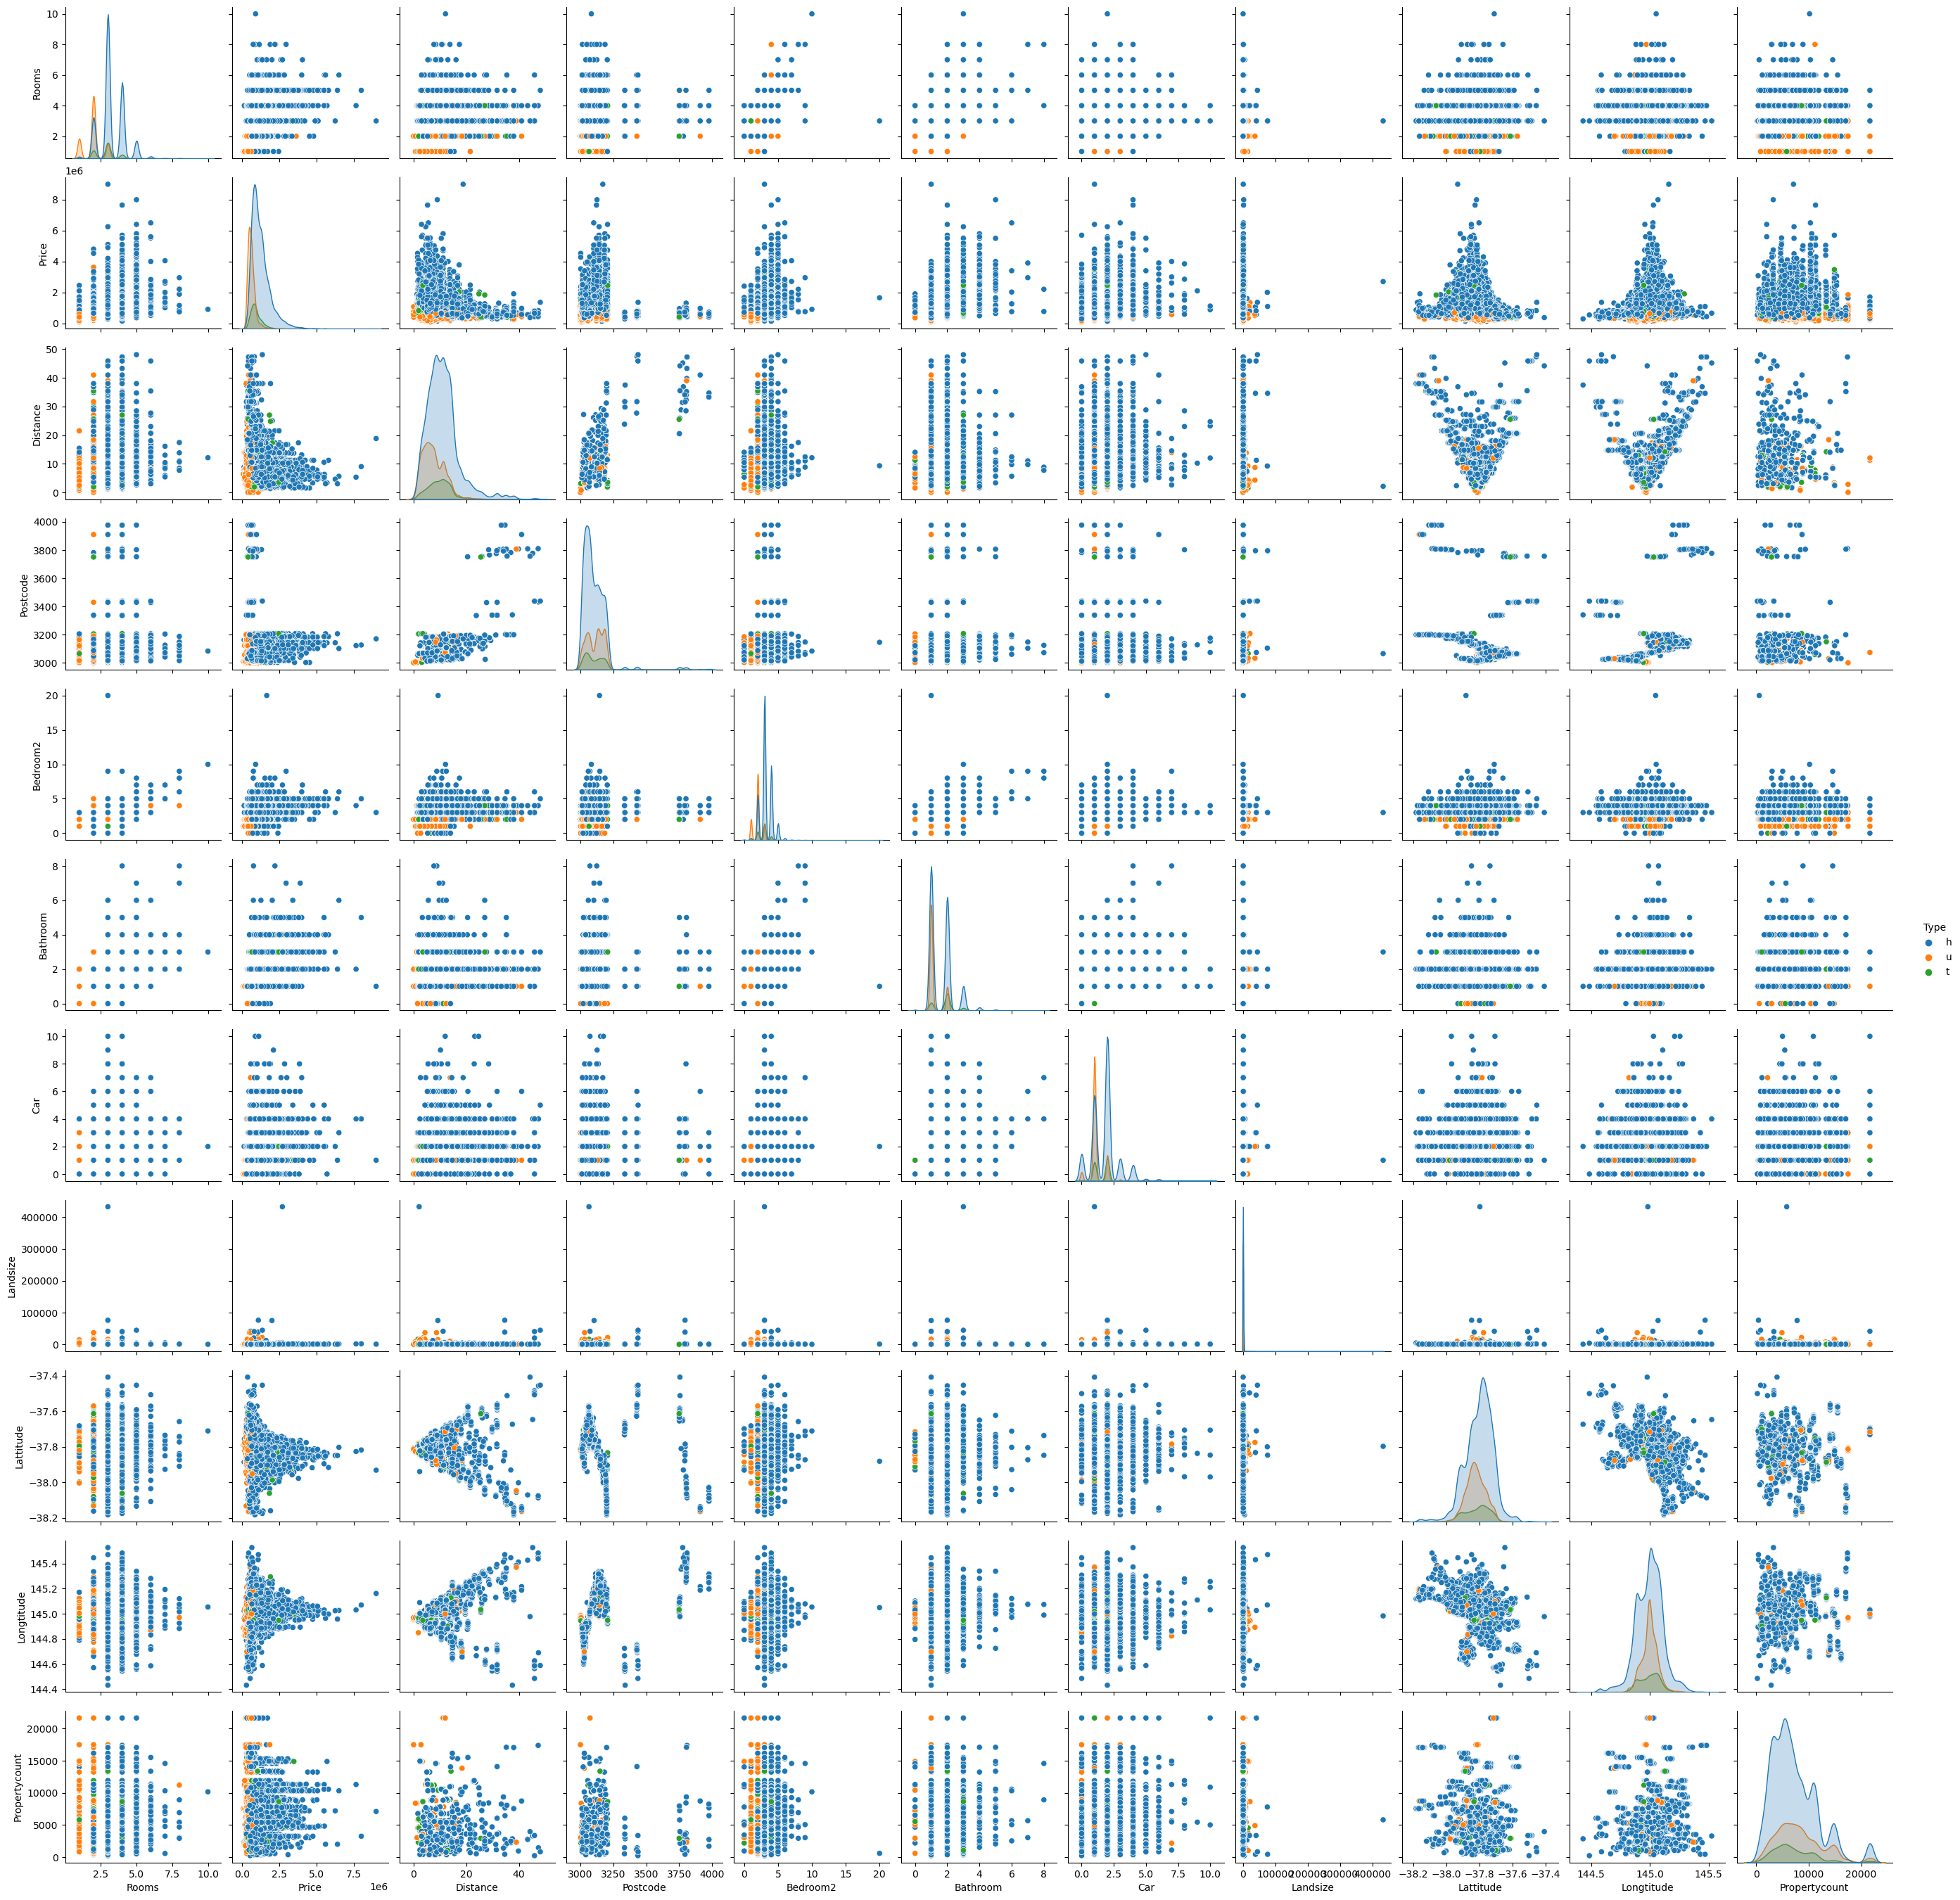

In [314]:
sns.pairplot(df_clean, hue="Type")

- The type of house and suburb are all categorical values, we need to convert them to one hot encoding or give numbers to each

In [315]:
temp_df = pd.get_dummies(df_clean["Type"])
df_clean = pd.concat([df_clean, temp_df], axis=1)
df_clean


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,h,t,u
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0,1,0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0,1,0,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13513,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,1,0,0
13514,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0,1,0,0
13515,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0,1,0,0
13516,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0,1,0,0


In [316]:
le = LabelEncoder()
label = le.fit_transform(df_clean["Suburb"])
df_clean["Suburb_1"] = label
df_clean

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,Suburb_1
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0,1,0,0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0,1,0,0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0,1,0,0,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0,1,0,0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13513,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,1,0,0,302
13514,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0,1,0,0,305
13515,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0,1,0,0,305
13516,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0,1,0,0,305


In [411]:
# Save label transformer
pickle.dump(le, open("./model/labeller.pkl", "wb"))

In [317]:
# drop h column to make it a base category
try:
	df_clean.drop("h", axis=1, inplace=True)
except:
	pass
df_clean

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,t,u,Suburb_1
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0,0,0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0,0,0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0,0,0,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0,0,0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13513,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,0,0,302
13514,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0,0,0,305
13515,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0,0,0,305
13516,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0,0,0,305


In [318]:
# selecting 2 vairables based on the info that type of the house and Suburb the house is located in will be able to predict price of the house
X = df_clean.loc[:, ["u", "t", "Suburb_1"]]
Y = df_clean["Price"]
# need to reshape Y as we need 2d array instead of 1d array for prediction
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [319]:
X_train

,u,t,Suburb_1
12672,0,0,80
8811,1,0,127
8431,0,1,272
5671,0,0,259
4357,0,0,215
...,...,...,...
905,0,0,30
5192,0,0,236
12172,0,0,269
235,0,0,11


In [320]:
print(X_train.shape)
print(X_test.shape)

(10814, 3)
(2704, 3)


In [321]:
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [322]:
lm.coef_

array([-630781.20846071, -323863.08981316,    -849.04830526])

In [323]:
lm.intercept_

1375398.093844338

model score: R^2

In [324]:
lm.score(X_test,Y_test)

0.20954516638233078

check for assumptions

In [325]:
# First we need linearity
y_pred = lm.predict(X_test)

In [326]:
resids = Y_test-y_pred
resids

9871      75570.814637
2007    -157474.229423
2819     510072.475671
10843    495637.335018
2937    -516979.427718
             ...      
3729    -543522.253982
487     -497115.224350
354     -660209.514181
7556     884412.886671
6978     -45957.736205
Name: Price, Length: 2704, dtype: float64

Text(0, 0.5, 'Residuals')

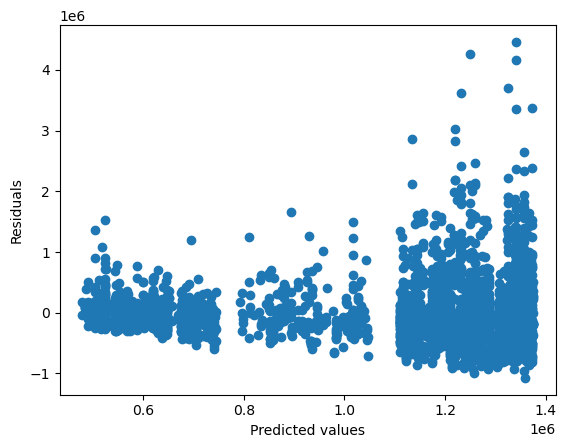

In [327]:
plt.scatter(y_pred, resids)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
#The plot does not appear to be homoscedastic, but they do appear linear

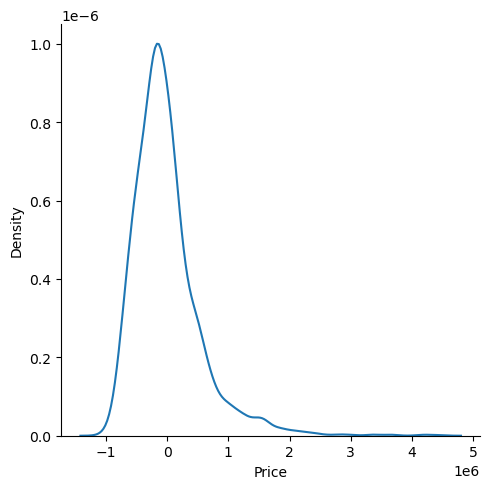

In [328]:
# Check if the residuals are normal
sns.displot(resids, kind="kde")
# There appears to be a positive skew.

Text(0, 0.5, 'Predicted Price')

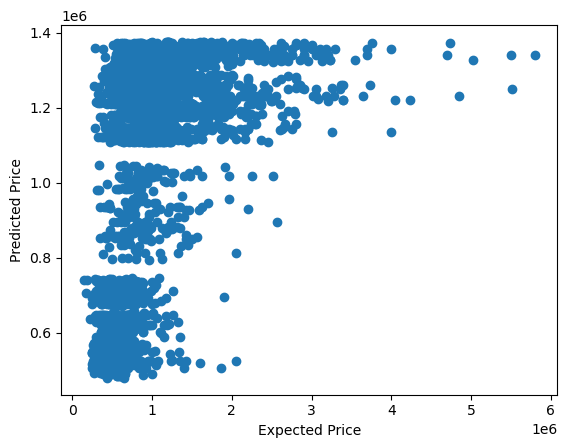

In [329]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Expected Price")
plt.ylabel("Predicted Price")

In [330]:
print(mean_squared_error(Y_test, y_pred))
print(mean_absolute_error(Y_test,y_pred))
print(math.sqrt(mean_squared_error(Y_test,y_pred)))
# rmse is around 550 thousand, so the error is pretty high for any house that might not be in 10 million dollars

309321168957.95953
390211.6434100816
556166.493918826


In [331]:
X_test.shape

(2704, 3)

In [332]:
X_test.iloc[0,:]

u             1
t             0
Suburb_1    118
Name: 9871, dtype: int32

In [333]:
np.array(X_test.iloc[0,:]).reshape(1,-1)

array([[  1,   0, 118]], dtype=int32)

In [334]:
lm.predict(np.array(X_test.iloc[0,:]).reshape(1,-1))

C:\Users\nilu1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([644429.18536279])

In [335]:
df_clean.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,t,u,Suburb_1
Rooms,1.000000,0.497656,0.293479,0.055551,0.944021,0.592917,0.408483,0.025609,0.016123,0.100427,-0.081394,-0.032043,-0.546352,-0.060218
Price,0.497656,1.000000,-0.161081,0.107371,0.476846,0.467720,0.238979,0.037482,-0.212444,0.204093,-0.041673,-0.066070,-0.393213,-0.135331
Distance,0.293479,-0.161081,1.000000,0.433515,0.295296,0.126343,0.262994,0.025209,-0.132830,0.239363,-0.055744,-0.015670,-0.232968,-0.040052
Postcode,0.055551,0.107371,0.433515,1.000000,0.060825,0.113885,0.050289,0.024899,-0.406699,0.446873,0.061987,-0.014700,0.032866,-0.058959
Bedroom2,0.944021,0.476846,0.295296,0.060825,1.000000,0.584657,0.405325,0.025574,0.016101,0.101918,-0.081206,-0.031692,-0.526130,-0.059298
Bathroom,0.592917,0.467720,0.126343,0.113885,0.584657,1.000000,0.322246,0.037160,-0.070666,0.118594,-0.051733,0.118757,-0.272381,-0.059098
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,-0.001963,0.063395,-0.024295,-0.016942,-0.268123,-0.031283
Landsize,0.025609,0.037482,0.025209,0.024899,0.025574,0.037160,0.026770,1.000000,0.009550,0.010837,-0.006746,-0.020876,-0.010813,0.001110
Lattitude,0.016123,-0.212444,-0.132830,-0.406699,0.016101,-0.070666,-0.001963,0.009550,1.000000,-0.357743,0.047141,-0.024888,-0.098100,0.138338
Longtitude,0.100427,0.204093,0.239363,0.446873,0.101918,0.118594,0.063395,0.010837,-0.357743,1.000000,0.066484,0.003408,0.005512,-0.140482


In [379]:
X_2 = df_clean.loc[:, ["u", "t", "Suburb_1", "Rooms", "Distance", "Bathroom", "Landsize"]]
Y_2 = df_clean["Price"]
# need to reshape Y as we need 2d array instead of 1d array for prediction
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=1)

In [380]:
X_train_2

,u,t,Suburb_1,Rooms,Distance,Bathroom,Landsize
12672,0,0,80,4,6.7,2.0,301.0
8811,1,0,127,1,5.1,1.0,30.0
8431,0,1,272,3,13.5,3.0,134.0
5671,0,0,259,3,3.3,1.0,211.0
4357,0,0,215,3,2.3,2.0,97.0
...,...,...,...,...,...,...,...
905,0,0,30,3,13.9,1.0,686.0
5192,0,0,236,2,11.2,1.0,452.0
12172,0,0,269,3,31.7,2.0,563.0
235,0,0,11,5,6.3,2.0,693.0


In [381]:
ss = StandardScaler()
X_train_2 = ss.fit_transform(X_train_2)
X_test_2 = ss.transform(X_test_2)

In [382]:
lm_2 = linear_model.LinearRegression()
lm_2.fit(X_train_2, Y_train_2)

LinearRegression()

In [383]:
y_pred_2 = lm_2.predict(X_test_2)

In [384]:
resid_2 = Y_test_2 - y_pred_2

In [389]:
score_2 = lm_2.score(X_test_2, Y_test_2)
print("R^2 : ", score_2)
print("adjusted R^2 : ", 1 - (1 - score_2) * (len(Y_test_2) - 1) / (len(Y_test_2) - X_test_2.shape[1] - 1))

R^2 :  0.48144159331875747
adjusted R^2 :  0.4800951879601637


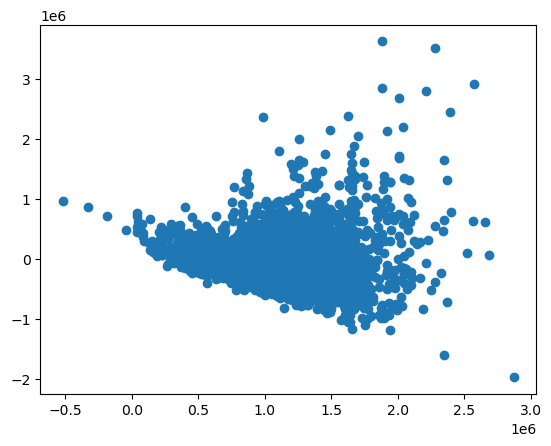

In [386]:
plt.scatter(y_pred_2, resid_2)

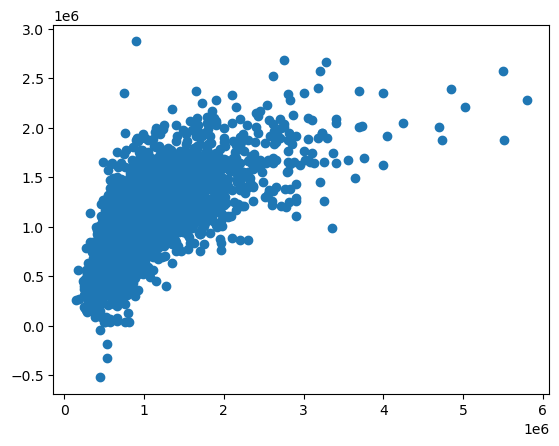

In [387]:
plt.scatter(Y_test_2, y_pred_2)

In [388]:
print(mean_squared_error(Y_test_2, y_pred_2))
print(mean_absolute_error(Y_test_2, y_pred_2))
print(math.sqrt(mean_squared_error(Y_test_2, y_pred_2)))
# rmse is around 550 thousand, so the error is pretty high for any house that might not be in 10 million dollars

202922527266.3744
317497.88782529917
450469.2300994313


New Data prediction

In [395]:
lm_2.predict(X_test_2[0,:].reshape(1,-1))

array([874116.16359413])

Pickle the model

Train whole dataset

In [404]:
X_3 = df_clean.loc[:, ["u", "t", "Suburb_1", "Rooms", "Distance", "Bathroom", "Landsize"]]
Y_3 = df_clean["Price"]
ss_3 = StandardScaler()
X_3 = ss_3.fit_transform(X_3)
lm_3 = linear_model.LinearRegression()
lm_3.fit(X_3, Y_3)
lm_3.score(X_3, Y_3)

0.4560112866245628

In [405]:
pickle.dump(lm_3, open("./model/model.pkl", "wb"))

In [409]:
pickle.dump(ss_3, open("./model/scaler.pkl", "wb"))

In [406]:
pickle_model = pickle.load(open("./model/model.pkl", "rb"))

In [407]:
pickle_model.predict(X_test_2[0,:].reshape(1,-1))

array([868884.21674184])